<a href="https://colab.research.google.com/github/dhshah1112/CMPE_255_Assignment_6/blob/main/CMPE255_Assignment6_A.ipynb" target="_parent">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/CMPE255_Assignment6/A/beverages_dataset.csv'  # Adjust the path if needed
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

# Show basic information about the dataset
print(data.info())
print(data.describe())


   Sweetness  Bitterness  Sourness  Alcohol_Content  Calorie_Count  Price  \
0          5          10         6               12            118  16.35   
1          0           0         9               20            109  18.61   
2          3           3         6                5             82   3.20   
3          3           6         2                5             87   5.13   
4          7           1         9               12            221  15.12   

         Type         Origin  
0        Wine         Africa  
1  Soft Drink  North America  
2      Coffee           Asia  
3        Beer           Asia  
4     Spirits  South America  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sweetness        500 non-null    int64  
 1   Bitterness       500 non-null    int64  
 2   Sourness         500 non-null    int64  
 3   Alcohol_Cont

In [ ]:
# One-hot encoding the categorical variables
data_encoded = pd.get_dummies(data, columns=['Type', 'Origin'])

# Check for missing values
print(data_encoded.isnull().sum())

# Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_encoded)

# Convert the scaled data back to a pandas DataFrame
scaled_data = pd.DataFrame(scaled_data, columns=data_encoded.columns)

print(scaled_data.head())


Sweetness               0
Bitterness              0
Sourness                0
Alcohol_Content         0
Calorie_Count           0
Price                   0
Type_Beer               0
Type_Coffee             0
Type_Juice              0
Type_Soft Drink         0
Type_Spirits            0
Type_Tea                0
Type_Wine               0
Origin_Africa           0
Origin_Asia             0
Origin_Europe           0
Origin_North America    0
Origin_South America    0
dtype: int64
   Sweetness  Bitterness  Sourness  Alcohol_Content  Calorie_Count     Price  \
0   0.033571    1.631037  0.450737        -0.230581      -0.704886  1.059636   
1  -1.580409   -1.592356  1.392389         0.369890      -0.827228  1.468564   
2  -0.612021   -0.625338  0.450737        -0.755993      -1.194257 -1.319743   
3  -0.612021    0.341680 -0.804798        -0.755993      -1.126289 -0.970526   
4   0.679163   -1.270017  1.392389        -0.230581       0.695261  0.837079   

   Type_Beer  Type_Coffee  Type_Juice 

In [ ]:
# Modified function to initialize centroids
def initialize_centroids(data, k):
    np.random.seed(42)  # for reproducibility
    random_indices = np.random.permutation(data.shape[0])[:k]
    return data[random_indices]

# Function to assign clusters
def assign_clusters(data, centroids):
    # Calculate distances between data points and centroids
    distances = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2))
    # Assign each data point to the closest centroid
    return np.argmin(distances, axis=0)

# Convert the DataFrame to a numpy array for processing
scaled_data_np = scaled_data.values

# Initialize centroids
centroids = initialize_centroids(scaled_data_np, k)

# Assign clusters to each data point
clusters = assign_clusters(scaled_data_np, centroids)
print(clusters[:10])  # Display the cluster assignments for the first 10 data points


[2 0 0 2 1 2 1 0 0 1]


In [ ]:
def update_centroids(data, clusters, k):
    new_centroids = np.zeros((k, data.shape[1]))
    for i in range(k):
        # Calculate the mean of the points assigned to each cluster
        new_centroids[i] = data[clusters == i].mean(axis=0)
    return new_centroids

# Update centroids
new_centroids = update_centroids(scaled_data_np, clusters, k)
print(new_centroids)


[[-0.21123421 -0.10397063  0.07365528 -0.26080605 -0.21469275 -0.28719929
  -0.0253742   0.75286848  0.06524348 -0.04694874 -0.39982204  0.09970953
  -0.37898391 -0.20633463 -0.34623758 -0.07995563  0.63361145 -0.05173825]
 [-0.17989106 -0.24580966  0.1554164   0.16852259  0.3765411   0.40233267
  -0.05872142 -0.31488571 -0.00706371  0.01862098  0.66345278  0.02807648
  -0.37136292  0.09676292  0.16121163  0.02878732 -0.23992382 -0.02708041]
 [ 0.39353718  0.37098315 -0.24170962  0.04554484 -0.23059045 -0.19418898
   0.08910873 -0.32490098 -0.05095412  0.02140522 -0.38684081 -0.12169057
   0.76086125  0.07724822  0.13093356  0.03975119 -0.30171076  0.07724822]]


In [ ]:
def k_means_clustering(data, k, max_iters=100, tolerance=1e-4):
    # Initialize centroids
    centroids = initialize_centroids(data, k)
    for i in range(max_iters):
        old_centroids = centroids.copy()

        # Assign clusters
        clusters = assign_clusters(data, centroids)

        # Update centroids
        centroids = update_centroids(data, clusters, k)

        # Check for convergence (if centroids do not change significantly)
        if np.all(np.abs(centroids - old_centroids) < tolerance):
            break

    return centroids, clusters

# Apply K-Means Clustering
k = 3  # Number of clusters
scaled_data_np = scaled_data.to_numpy()
final_centroids, final_clusters = k_means_clustering(scaled_data_np, k)

In [ ]:
from sklearn.decomposition import PCA


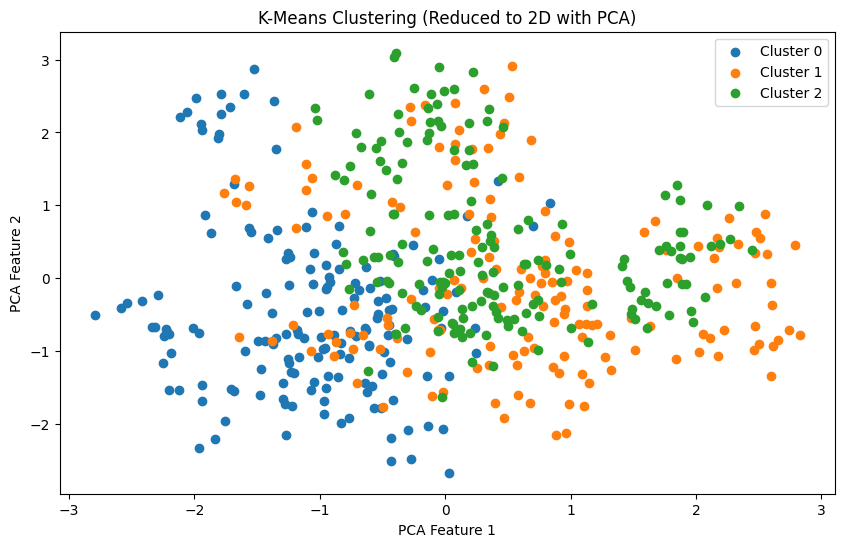

In [ ]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data_np)

# Plotting the reduced data points
plt.figure(figsize=(10, 6))
for i in range(k):
    cluster_data = reduced_data[final_clusters == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {i}')
plt.title('K-Means Clustering (Reduced to 2D with PCA)')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score


In [ ]:
# Calculate Inertia
inertia = np.sum(np.min(np.sqrt(((scaled_data_np - final_centroids[:, np.newaxis])**2).sum(axis=2)), axis=0))

# Calculate Silhouette Score
silhouette_avg = silhouette_score(scaled_data_np, final_clusters)

print("Inertia:", inertia)
print("Silhouette Score:", silhouette_avg)

Inertia: 1987.3610288521552
Silhouette Score: 0.08292130974872887


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

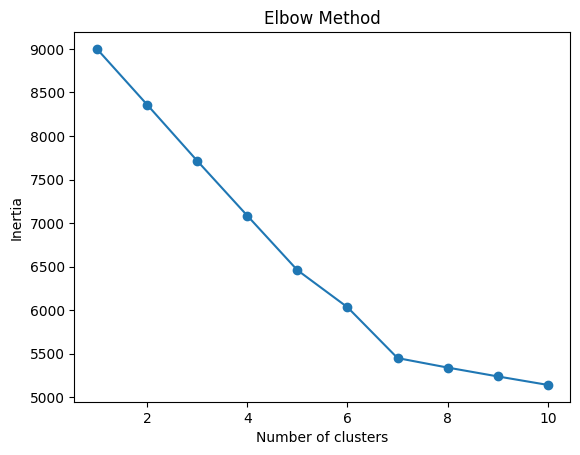

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow Method for finding the optimal number of clusters
inertia_values = []
for i in range(1, 11):  # Test different numbers of clusters (e.g., 1 to 10)
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data_np)
    inertia_values.append(kmeans.inertia_)

# Plotting the Elbow graph
plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

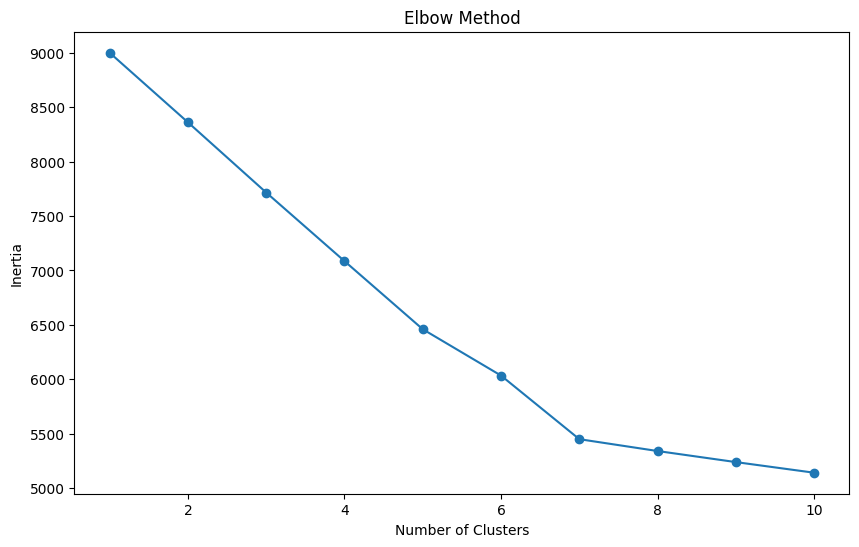

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow Method for finding the optimal number of clusters
inertia_values = []
for i in range(1, 11):  # Trying different numbers of clusters (e.g., 1 to 10)
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data_np)
    inertia_values.append(kmeans.inertia_)

# Plotting the Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [ ]:
def k_means_clustering(data, k, max_iters=100, tolerance=1e-4):
    # Initialize centroids
    centroids = initialize_centroids(data, k)
    for i in range(max_iters):
        old_centroids = centroids.copy()

        # Assign clusters
        clusters = assign_clusters(data, centroids)

        # Update centroids
        centroids = update_centroids(data, clusters, k)

        # Check for convergence (if centroids do not change significantly)
        if np.all(np.abs(centroids - old_centroids) < tolerance):
            break

    return centroids, clusters

# Apply K-Means Clustering
k = 5  # Number of clusters
scaled_data_np = scaled_data.to_numpy()
final_centroids, final_clusters = k_means_clustering(scaled_data_np, k)

In [ ]:
from sklearn.decomposition import PCA


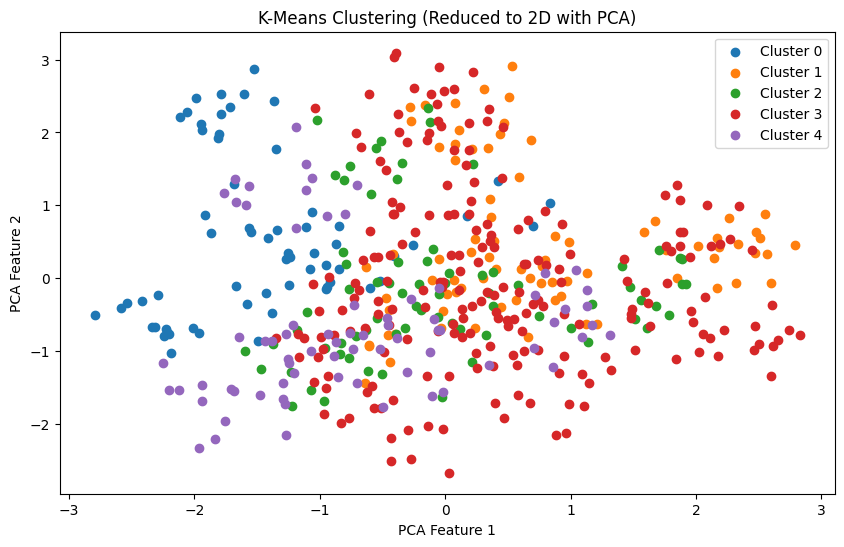

In [ ]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data_np)

# Plotting the reduced data points
plt.figure(figsize=(10, 6))
for i in range(k):
    cluster_data = reduced_data[final_clusters == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {i}')
plt.title('K-Means Clustering (Reduced to 2D with PCA)')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.legend()
plt.show()

In [ ]:
# Calculate Inertia
inertia = np.sum(np.min(np.sqrt(((scaled_data_np - final_centroids[:, np.newaxis])**2).sum(axis=2)), axis=0))

# Calculate Silhouette Score
silhouette_avg = silhouette_score(scaled_data_np, final_clusters)

print("Inertia:", inertia)
print("Silhouette Score:", silhouette_avg)

Inertia: 1802.8703220567127
Silhouette Score: 0.167141777061182
